In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#

In [2]:
#importing data set
df=pd.read_csv("https://github.com/zep-analytics/IPLScorePredictor/raw/main/ipl_data.csv")
print({df.shape})

{(76014, 15)}


In [3]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [4]:
df.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


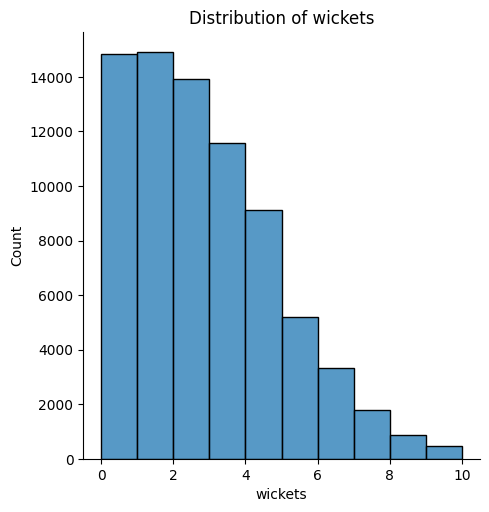

In [7]:
#visualiztion of wickets
sns.displot(df['wickets'],kde=False,bins=10)
plt.title("Distribution of wickets")
plt.show()

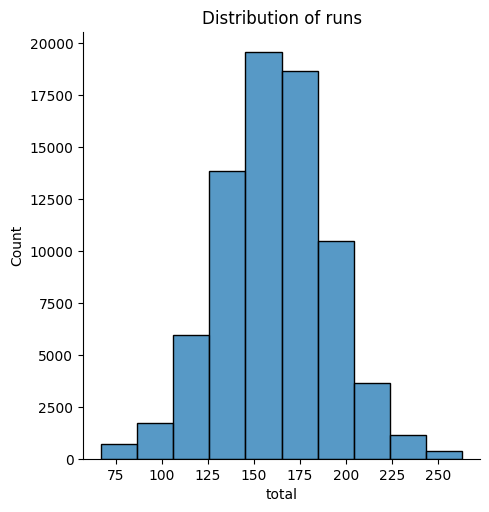

In [10]:
#visualization of total scores
sns.displot(df['total'],kde=False,bins=10)
plt.title("Distribution of runs")
plt.show()

In [11]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [12]:
irrelevant=['mid', 'date', 'venue','batsman', 'bowler','striker','non-striker']
print(f'Before removing unwanted columns : {df.shape}')
df=df.drop(irrelevant,axis=1)
print(f'After removing unwanted columns : {df.shape}')
df.head()

Before removing unwanted columns : (76014, 15)
After removing unwanted columns : (76014, 8)


,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [16]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [17]:
const_teams=['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians','Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils','Sunrisers Hyderabad']

In [18]:
print(f'Before removing unwanted columns : {df.shape}')
df=df[(df['bat_team'].isin(const_teams)) & (df['bowl_team'].isin(const_teams))]
print(f'After removing unwanted columns : {df.shape}')
print(f"Consistent Teams: {df['bat_team'].unique()}")
df.head()

Before removing unwanted columns : (76014, 8)
After removing unwanted columns : (53811, 8)
Consistent Teams: ['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Kings XI Punjab' 'Royal Challengers Bangalore'
 'Delhi Daredevils' 'Sunrisers Hyderabad']


,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


**Remove first 5 overs of every match**

In [19]:
print(f'Before removing Overs : {df.shape}')
df=df[df['overs']>=5.0]
print(f'After removing overs : {df.shape}')
df.head()

Before removing Overs : (53811, 8)
After removing overs : (40108, 8)


,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


**Data Preprossing**

In [22]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le=LabelEncoder()
for i in ['bat_team','bowl_team']:
  df[i]=le.fit_transform(df[i])
df.head()

,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,3,6,61,0,5.1,59,0,222
33,3,6,61,1,5.2,59,1,222
34,3,6,61,1,5.3,59,1,222
35,3,6,61,1,5.4,59,1,222
36,3,6,61,1,5.5,58,1,222


**Performing onehotencoder and columnn transformation**

In [23]:
from sklearn.compose import ColumnTransformer
col_trans=ColumnTransformer([('encoder',OneHotEncoder(),[0,1])],remainder='passthrough')
df=np.array(col_trans.fit_transform(df))
df

array([[  0.,   0.,   0., ...,  59.,   0., 222.],
       [  0.,   0.,   0., ...,  59.,   1., 222.],
       [  0.,   0.,   0., ...,  59.,   1., 222.],
       ...,
       [  0.,   0.,   0., ...,  28.,   4., 107.],
       [  0.,   0.,   0., ...,  24.,   4., 107.],
       [  0.,   0.,   0., ...,  23.,   5., 107.]])

In [24]:
cols = ['batting_team_Chennai Super Kings', 'batting_team_Delhi Daredevils', 'batting_team_Kings XI Punjab',
              'batting_team_Kolkata Knight Riders', 'batting_team_Mumbai Indians', 'batting_team_Rajasthan Royals',
              'batting_team_Royal Challengers Bangalore', 'batting_team_Sunrisers Hyderabad',
              'bowling_team_Chennai Super Kings', 'bowling_team_Delhi Daredevils', 'bowling_team_Kings XI Punjab',
              'bowling_team_Kolkata Knight Riders', 'bowling_team_Mumbai Indians', 'bowling_team_Rajasthan Royals',
              'bowling_team_Royal Challengers Bangalore', 'bowling_team_Sunrisers Hyderabad', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'total']
df=pd.DataFrame(df,columns=cols)
df.head()

,batting_team_Chennai Super Kings,batting_team_Delhi Daredevils,batting_team_Kings XI Punjab,batting_team_Kolkata Knight Riders,batting_team_Mumbai Indians,batting_team_Rajasthan Royals,batting_team_Royal Challengers Bangalore,batting_team_Sunrisers Hyderabad,bowling_team_Chennai Super Kings,bowling_team_Delhi Daredevils,...,bowling_team_Mumbai Indians,bowling_team_Rajasthan Royals,bowling_team_Royal Challengers Bangalore,bowling_team_Sunrisers Hyderabad,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,0.0,5.1,59.0,0.0,222.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,1.0,5.2,59.0,1.0,222.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,1.0,5.3,59.0,1.0,222.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,1.0,5.4,59.0,1.0,222.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,61.0,1.0,5.5,58.0,1.0,222.0


**Model Building**

In [26]:
x=df.drop(['total'],axis=1)
y=df['total']

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print(f"Training Set : {x_train.shape}")
print(f"Testing Set : {x_test.shape}")

Training Set : (32086, 21)
Testing Set : (8022, 21)


**Using Algorithms**

In [29]:
models=dict()

1.***Linear*** ***Regression***

In [30]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [32]:
train_score_lr=str(regressor.score(x_train,y_train)*100)
test_score_lr=str(regressor.score(x_test,y_test)*100)
print(f"Training Score of linear regression model : {train_score_lr}%")
print(f"Testing Score of linear regresson model: {test_score_lr}%")

Training Score of linear regression model : 65.73506957934367%
Testing Score of linear regresson model: 66.61679829937492%


In [33]:
from sklearn.metrics import mean_absolute_error as mae,mean_squared_error as mse
y_pred=regressor.predict(x_test)
print(f"Mean Absolute Error : {mae(y_test,y_pred)}")
print(f"Mean Squared Error : {mse(y_test,y_pred)}")

Mean Absolute Error : 13.03610595398452
Mean Squared Error : 302.17345508236315


***2.RandomForestRegression***

In [34]:
from sklearn.ensemble import RandomForestRegressor
regressor2=RandomForestRegressor()
regressor2.fit(x_train,y_train)

RandomForestRegressor()

In [35]:
train_score_rf=str(regressor2.score(x_train,y_train)*100)
test_score_rf=str(regressor2.score(x_test,y_test)*100)
print(f"Training Score of RandomForestRegression model : {train_score_rf}%")
print(f"Testing Score of RandomForestRegression model: {test_score_rf}%")

Training Score of RandomForestRegression model : 99.03204397370538%
Testing Score of RandomForestRegression model: 93.40746575208128%


**PREDICTION OF SCORE**

In [36]:
def score_predict(batting_team,bowling_team,overs,runs,wickets,runs_last_5,wickets_last_5,model=regressor2):
  prediction_array=[]
  #batting team
  if batting_team=='Chennai Super Kings':
    prediction_array=prediction_array+[1,0,0,0,0,0,0,0]

  elif batting_team == 'Delhi Daredevils':
    prediction_array = prediction_array + [0,1,0,0,0,0,0,0]

  elif batting_team == 'Kings XI Punjab':
    prediction_array = prediction_array + [0,0,1,0,0,0,0,0]

  elif batting_team == 'Kolkata Knight Riders':
    prediction_array = prediction_array + [0,0,0,1,0,0,0,0]

  elif batting_team == 'Mumbai Indians':
    prediction_array = prediction_array + [0,0,0,0,1,0,0,0]

  elif batting_team == 'Rajasthan Royals':
    prediction_array = prediction_array + [0,0,0,0,0,1,0,0]

  elif batting_team == 'Royal Challengers Bangalore':
    prediction_array = prediction_array + [0,0,0,0,0,0,1,0]

  elif batting_team == 'Sunrisers Hyderabad':
    prediction_array = prediction_array + [0,0,0,0,0,0,0,1]

  #bowling team
  if bowling_team=='Chennai Super Kings':
    prediction_array=prediction_array+[1,0,0,0,0,0,0,0]
  elif bowling_team == 'Delhi Daredevils':
    prediction_array = prediction_array + [0,1,0,0,0,0,0,0]
  elif bowling_team == 'Kings XI Punjab':
    prediction_array = prediction_array + [0,0,1,0,0,0,0,0]
  elif bowling_team == 'Kolkata Knight Riders':
    prediction_array = prediction_array + [0,0,0,1,0,0,0,0]
  elif bowling_team == 'Mumbai Indians':
    prediction_array = prediction_array + [0,0,0,0,1,0,0,0]
  elif bowling_team == 'Rajasthan Royals':
    prediction_array = prediction_array + [0,0,0,0,0,1,0,0]
  elif bowling_team == 'Royal Challengers Bangalore':
    prediction_array = prediction_array + [0,0,0,0,0,0,1,0]
  elif bowling_team == 'Sunrisers Hyderabad':
    prediction_array = prediction_array + [0,0,0,0,0,0,0,1]

  prediction_array=prediction_array+[runs,wickets,overs,runs_last_5,wickets_last_5]
  prediction_array=np.array([prediction_array])
  pred=model.predict(prediction_array)
  return int(round(pred[0]))


**Testing of the model's predictions**

***Test1***

In [37]:
batting_team='Delhi Daredevils'
bowling_team='Chennai Super Kings'
score=score_predict(batting_team, bowling_team, overs=10.2,runs=68,wickets=3,runs_last_5=29,wickets_last_5=1)
print(f'Predicted Score : {score} || Actual Score:147')

Predicted Score : 145 || Actual Score:147


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


**Test2**

In [38]:
batting_team='Mumbai Indians'
bowling_team='Kings XI Punjab'
score=score_predict(batting_team, bowling_team, overs=12.3,runs=113,wickets=2,runs_last_5=55,wickets_last_5=0)
print(f'Predicted Score : {score} || Actual Score:176')

Predicted Score : 190 || Actual Score:176


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


**Test3**

In [39]:
batting_team='Kings XI Punjab'
bowling_team='Rajasthan Royals'
score=score_predict(batting_team, bowling_team, overs=14,runs=118,wickets=1,runs_last_5=45,wickets_last_5=0)
print(f'Predicted Score : {score} || Actual Score:185')

Predicted Score : 190 || Actual Score:185


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


**Test4**

In [40]:
batting_team="Kolkata Knight Riders"
bowling_team="Chennai Super Kings"
score = score_predict(batting_team, bowling_team, overs=18.0, runs=150, wickets=4, runs_last_5=57, wickets_last_5=1)
print(f'Predicted Score : {score} || Actual Score : 172')

Predicted Score : 174 || Actual Score : 172


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


**Test5**

In [41]:
batting_team='Delhi Daredevils'
bowling_team='Mumbai Indians'
score = score_predict(batting_team, bowling_team, overs=18.0, runs=96, wickets=8, runs_last_5=18, wickets_last_5=4)
print(f'Predicted Score : {score} || Actual Score : 110')

Predicted Score : 109 || Actual Score : 110


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


**Test6**

In [42]:
batting_team='Kings XI Punjab'
bowling_team='Chennai Super Kings'
score = score_predict(batting_team, bowling_team, overs=18.0, runs=129, wickets=6, runs_last_5=34, wickets_last_5=2)
print(f'Predicted Score : {score} || Actual Score : 153')

Predicted Score : 148 || Actual Score : 153


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


**Test7**

In [43]:
batting_team='Sunrisers Hyderabad'
bowling_team='Royal Challengers Bangalore'
score = score_predict(batting_team, bowling_team, overs=10.5, runs=67, wickets=3, runs_last_5=29, wickets_last_5=1)
print(f'Predicted Score : {score} || Actual Score : 146')

Predicted Score : 152 || Actual Score : 146


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [45]:
#exporting the model
import pickle
filename = "ml_model.pkl"
pickle.dump(regressor2, open(filename, "wb"))